In [1]:
import pandas as pd
import numpy as np

## 원본 트윗 데이터 불러오기

In [2]:
#트윗데이터 불러오기
twitts_bit = pd.read_csv('./Bitcoin_tweets.csv')
twitts_bit.head()

C:\Users\lily0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


## Bitcoin_twitts.csv Data Annotation 
 - user_name
 - user_location 
 - user_description	
 - user_created	
 - user_followers	
 - user_friends	
 - user_favourites	
 - user_verified	
 - date	
 - text	
 - hashtags	
 - source
 - is_retweet

### 2. 데이터 탐색하기 (EDA)

데이터의 각 변수의 기본 정보 및 각 변수의 특성을 살펴보겠습니다.


In [3]:
print(" 원본 데이터shape: ", twitts_bit.shape)
twitts_bit.isnull().sum()

 원본 데이터shape:  (1751675, 13)


user_name               27
user_location       843314
user_description    206838
user_created            26
user_followers          46
user_friends            46
user_favourites         46
user_verified           46
date                    46
text                    46
hashtags             17003
source                3573
is_retweet             259
dtype: int64

In [4]:
twitts_bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751675 entries, 0 to 1751674
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        object 
dtypes: float64(1), object(12)
memory usage: 173.7+ MB


## 데이터 전처리
 -- 필요없는 열과 분석에 꼭 필요한 트윗본문이 결측치인 행을 삭제하였다

In [5]:
#데이터전처리: 필요없는 열 제거
twitts_bit.drop(['user_location', 'user_created', 'user_verified', 'source'], axis=1)

,user_name,user_description,user_followers,user_friends,user_favourites,date,text,hashtags,is_retweet
0,DeSota Wilson,"Biz Consultant, real estate, fintech, startups...",8534.0,7605,4838,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],False
1,CryptoND,😎 BITCOINLIVE is a Dutch platform aimed at inf...,6769.0,1532,25483,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",False
2,Tdlmatias,"IM Academy : The best #forex, #SelfEducation, ...",128.0,332,924,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,False
3,Crypto is the future,I will post a lot of buying signals for BTC tr...,625.0,129,14,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Co-founder @RENJERJerky | Forbes 30Under30 | I...,1249.0,1472,10482,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],False
...,...,...,...,...,...,...,...,...,...
1751670,JomCRYPTO,Developer,5.0,41,394,2021-11-12 20:27:16,@WatcherGuru #Btc\n#ETH \n#LTC \n#COSMOS \n#St...,"['Btc', 'ETH', 'LTC', 'COSMOS', 'Stellar', 'Do...",False
1751671,Ali,NaN,80.0,217,191,2021-11-12 20:27:15,@TheBitcoinConf @priceoftomorrow @addyinvest @...,"['shib', 'shiba', 'shiba_army', 'shibaw', 'shi...",False
1751672,Muhammed,NaN,34.0,81,3695,2021-11-12 20:27:08,@Heatherfernsby #pitbulltoken will be the doge...,"['pitbulltoken', 'pitbull', 'PitbullToken100x'...",False
1751673,Francesco Santoro $VET,"Investitore #BNB , #CRO e #VET appassionato d...",76.0,354,1011,2021-11-12 20:27:08,I am changing the way I invest. In the wallet ...,"['VET', 'btc', 'BNB']",False


In [6]:
#트윗이 결측치일때 행 삭제
twitts_bit.dropna(subset=['text'],inplace=True)

In [7]:
#결측치 제거 후 컬럼별 결측치 개수 확인
twitts_bit.isnull().sum()

user_name               27
user_location       843288
user_description    206817
user_created             0
user_followers           0
user_friends             0
user_favourites          0
user_verified            0
date                     0
text                     0
hashtags             16957
source                3527
is_retweet             213
dtype: int64

## 자연어처리 패키지인 nltk를 이용하여 트윗본문에 대한 감성분석 실시

In [8]:
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

> Downloading Stopwords

In [9]:
#자연어 처리: 불용어 정의하기
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])


print(stop_words)   #nltk가 정의한 불용어 출력

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lily0\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lily0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lily0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


> Tokenizing & Stemming

In [10]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [11]:
#표제어 추출
lemm = WordNetLemmatizer()
def cleaning(data):
    #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)
    #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)
    
    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [lemm.lemmatize(t) for t in tokens_without_sw]
    
    #6. Joining
    return " ".join(text_cleaned)

> 트윗본문 전처리 완료

In [12]:
twitts_bit['cleaned_tweets'] = twitts_bit['text'].apply(cleaning)
twitts_bit.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleaned_tweets
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,Blue Ridge Bank share halted NYSE ATM announce...
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,Today Take friend expe
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,Guys evening I read article BTC would like share
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,BTC A big chance billion Price
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,This network secured node today Soon biggest b...


> 추가 클랜징

In [13]:
twitts_bit.isnull().sum()

user_name               27
user_location       843288
user_description    206817
user_created             0
user_followers           0
user_friends             0
user_favourites          0
user_verified            0
date                     0
text                     0
hashtags             16957
source                3527
is_retweet             213
cleaned_tweets           0
dtype: int64

In [14]:
twitts_bit.dropna(subset=['cleaned_tweets'],inplace=True)

> 감성분석 수행

In [15]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [16]:
twitts_bit['subjectivity'] = twitts_bit['cleaned_tweets'].apply(getSubjectivity)
twitts_bit['polarity'] = twitts_bit['cleaned_tweets'].apply(getPolarity)
twitts_bit.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleaned_tweets,subjectivity,polarity
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,Blue Ridge Bank share halted NYSE ATM announce...,0.1,0.00
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,Today Take friend expe,0.0,0.00
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,Guys evening I read article BTC would like share,0.0,0.00
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,BTC A big chance billion Price,0.1,0.00
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,This network secured node today Soon biggest b...,0.2,-0.25


In [17]:
def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score ==0:
        return 'neutral'
    else:
        return 'positive'

In [18]:
twitts_bit['sentiment'] = twitts_bit['polarity'].apply(getSentiment)
twitts_bit.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleaned_tweets,subjectivity,polarity,sentiment
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,Blue Ridge Bank share halted NYSE ATM announce...,0.1,0.00,neutral
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,Today Take friend expe,0.0,0.00,neutral
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,Guys evening I read article BTC would like share,0.0,0.00,neutral
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,BTC A big chance billion Price,0.1,0.00,neutral
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,This network secured node today Soon biggest b...,0.2,-0.25,negative


> 감성 비율 확인

<AxesSubplot:xlabel='sentiment', ylabel='count'>

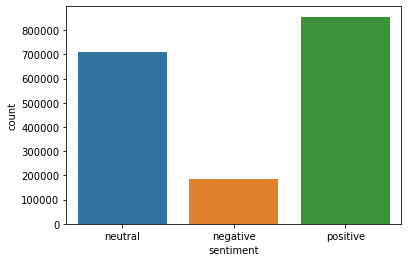

In [21]:
import seaborn as sns
sns.countplot(x = twitts_bit['sentiment'], data = twitts_bit)

In [22]:
#지금까지 결과물 csv로 저장
twitts_bit.to_csv("./bit_tweets_class.csv", index = False)

> Bitcoin Twitts Classifier using CNN

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D
from keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
# 확인
bit_senti = pd.read_csv("./bit_tweets_class.csv")
bit_senti

C:\Users\lily0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleaned_tweets,subjectivity,polarity,sentiment
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,Blue Ridge Bank share halted NYSE ATM announce...,0.100000,0.000000,neutral
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,Today Take friend expe,0.000000,0.000000,neutral
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,Guys evening I read article BTC would like share,0.000000,0.000000,neutral
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,BTC A big chance billion Price,0.100000,0.000000,neutral
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,This network secured node today Soon biggest b...,0.200000,-0.250000,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751624,JomCRYPTO,NaN,Developer,2021-10-05 12:50:30,5.0,41,394,False,2021-11-12 20:27:16,@WatcherGuru #Btc\n#ETH \n#LTC \n#COSMOS \n#St...,"['Btc', 'ETH', 'LTC', 'COSMOS', 'Stellar', 'Do...",Twitter for iPhone,False,Dogs,0.000000,0.000000,neutral
1751625,Ali,NaN,NaN,2021-04-08 05:50:42,80.0,217,191,False,2021-11-12 20:27:15,@TheBitcoinConf @priceoftomorrow @addyinvest @...,"['shib', 'shiba', 'shiba_army', 'shibaw', 'shi...",Twitter for iPhone,False,Calm We go moon soon The new Shiba It x Unveil...,0.602273,0.218182,positive
1751626,Muhammed,NaN,NaN,2021-04-05 15:26:19,34.0,81,3695,False,2021-11-12 20:27:08,@Heatherfernsby #pitbulltoken will be the doge...,"['pitbulltoken', 'pitbull', 'PitbullToken100x'...",Twitter for Android,False,dogecoin future huge investor base,0.675000,-0.133333,negative
1751627,Francesco Santoro $VET,NaN,"Investitore #BNB , #CRO e #VET appassionato d...",2021-03-08 20:54:47,76.0,354,1011,False,2021-11-12 20:27:08,I am changing the way I invest. In the wallet ...,"['VET', 'btc', 'BNB']",Twitter for Android,False,I changing way I invest In wallet The rest fun...,0.000000,0.000000,neutral


In [25]:
# Encode Categorical Variable
X = bit_senti['cleaned_tweets'].astype(str)
y = pd.get_dummies(bit_senti['sentiment']).values   # 머신러닝 사용을 위해 범주형 -> 수치데이터
num_classes = bit_senti['sentiment'].nunique()    #3

In [26]:
seed = 101         # fix random seed for reproducibility
np.random.seed(seed)    # random성을 제어할 난수고정.

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,    
                                                    random_state=seed)    #stratify: 데이터의  유니크y값 비율을  y만큼 유지.  random_state: 데이터분할시 셔플이 이루어지는데 이를위한 시드값 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1401303,) (350326,) (1401303, 3) (350326, 3)


In [27]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [28]:
from keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(1401303, 30) (350326, 30)


In [29]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 5

max_features = 20000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 100)               5

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/5
10948/10948 - 425s - loss: 0.0577 - accuracy: 0.9818 - val_loss: 0.0307 - val_accuracy: 0.9910 - 425s/epoch - 39ms/step
Epoch 2/5
10948/10948 - 430s - loss: 0.0262 - accuracy: 0.9922 - val_loss: 0.0251 - val_accuracy: 0.9926 - 430s/epoch - 39ms/step
Epoch 3/5
10948/10948 - 426s - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0252 - val_accuracy: 0.9926 - 426s/epoch - 39ms/step
Epoch 4/5
10948/10948 - 1251s - loss: 0.0158 - accuracy: 0.9954 - val_loss: 0.0249 - val_accuracy: 0.9930 - 1251s/epoch - 114ms/step
Epoch 5/5
10948/10948 - 425s - loss: 0.0127 - accuracy: 0.9963 - val_loss: 0.0270 - val_accuracy: 0.9926 - 425s/epoch - 39ms/step


In [31]:
# predict class with test set
y_pred_test =  np.argmax(model.predict(X_test), axis=1)
print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

Accuracy:	99.3%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     37389
           1       1.00      1.00      1.00    141799
           2       0.99      0.99      0.99    171138

    accuracy                           0.99    350326
   macro avg       0.99      0.99      0.99    350326
weighted avg       0.99      0.99      0.99    350326



> Confusion Matrix -분류 모델 성능 평가 지표

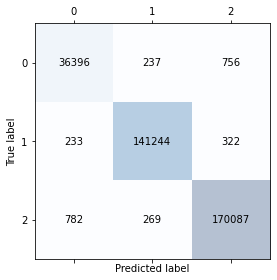

In [32]:
#confusion matrix
import matplotlib.pyplot as plt
confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va ='center', ha='center')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.tight_layout()